Import necessary libraries

In [1]:
#!pip install wordcloud

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Read the data and perform Data cleaning and Data Preprocessing

In [2]:
data = pd.read_csv("C:\\Users\\Varma\\Desktop\\Online Courses\\Deep learning datasets\\spam.csv",encoding='ISO-8859-1')

In [3]:
data

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.drop("Unnamed: 2",axis='columns',inplace=True)

In [5]:
data.drop("Unnamed: 3",axis='columns',inplace=True)

In [6]:
data.drop("Unnamed: 4",axis='columns',inplace=True)


In [7]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
print(" Total number of rows in the dataset are", len(data))

 Total number of rows in the dataset are 5572


In [10]:
data.message[data.duplicated()]

102     As per your request 'Melle Melle (Oru Minnamin...
153     As per your request 'Melle Melle (Oru Minnamin...
206     As I entered my cabin my PA said, '' Happy B'd...
222                                Sorry, I'll call later
325                      No calls..messages..missed calls
                              ...                        
5524    You are awarded a SiPix Digital Camera! call 0...
5535    I know you are thinkin malaria. But relax, chi...
5539                           Just sleeping..and surfing
5553                          Hahaha..use your brain dear
5558                               Sorry, I'll call later
Name: message, Length: 403, dtype: object

In [11]:
dup = data.duplicated().sum()
print("There are",dup,"number of duplicated records")

There are 403 number of duplicated records


In [12]:
data.drop_duplicates(inplace=True)
print(data.shape)

(5169, 2)


The below code indicates that there are no null and missing values in the dataset

In [13]:
data['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [14]:
print(data.isnull().sum())

label      0
message    0
dtype: int64


In [15]:
data.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [16]:
 ham_msg = data[data.label=='ham']
spam_msg = data[data.label=='spam']

In [17]:
ham_msg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
spam_msg

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
ham_msg_txt = ham_msg.message.tolist()
ham_msg_txt[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.']

In [20]:
ham_msg_txt = " ".join(ham_msg_txt)
ham_msg_txt

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

(-0.5, 799.5, 499.5, -0.5)

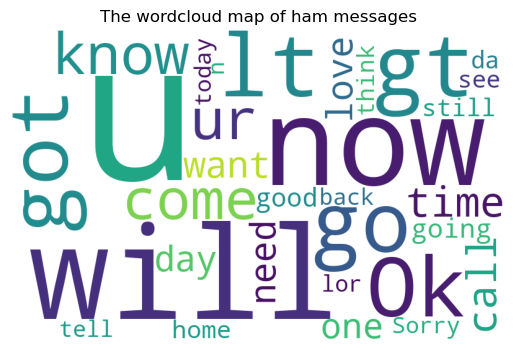

In [21]:
wc = WordCloud(background_color='white', width = 800, height = 500,min_font_size = 10,max_words=30).generate(ham_msg_txt)
plt.imshow(wc)
plt.title("The wordcloud map of ham messages")
plt.axis('off')


In [22]:
spam_msg_txt = spam_msg.message.tolist()
spam_msg_txt[:5]

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info']

In [23]:
spam_msg_txt = " ".join(spam_msg_txt)
spam_msg_txt

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

(-0.5, 799.5, 499.5, -0.5)

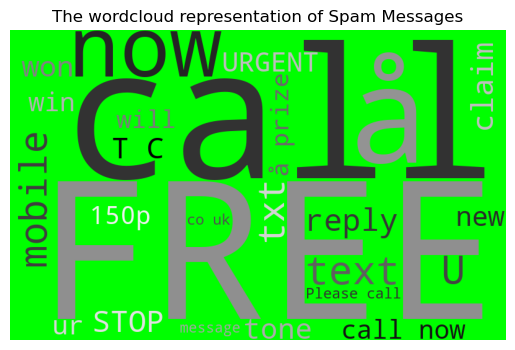

In [24]:
wc = WordCloud(background_color='lime', colormap = 'binary', width = 800, height = 500,min_font_size = 7,max_words=25).generate(spam_msg_txt)
plt.imshow(wc)
plt.title("The wordcloud representation of Spam Messages")
plt.axis('off')


In [25]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data['label'].replace({'ham': 0, 'spam': 1},inplace=True)
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [29]:
data['num_characters']=data['message'].apply(len)
data.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [31]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
data.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation] #For removing punctuations
    nopunc = ''.join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #For removing stopwords
    
    from nltk.stem.porter import PorterStemmer
    ps =PorterStemmer()
    clean1 = [ps.stem(word) for word in clean]
    
    
    return " ".join(clean1)
# to show the tokenization

data['transformed message'] = data['message'].apply(process)


In [34]:
data['transformed message'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

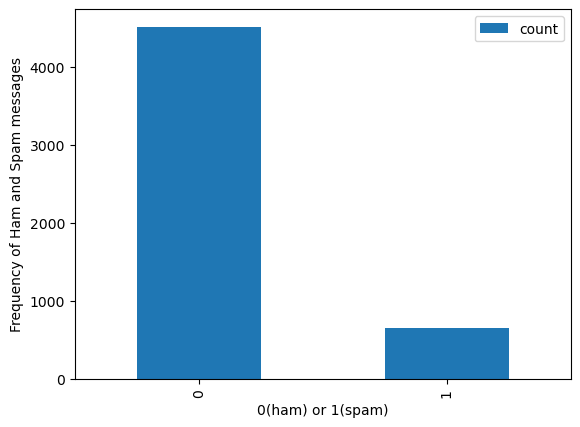

In [27]:
data.label.value_counts().plot(kind='bar')
plt.xlabel('0(ham) or 1(spam)')
plt.ylabel('Frequency of Ham and Spam messages')
plt.legend()

Distribution of ham and spam messages before oversampling


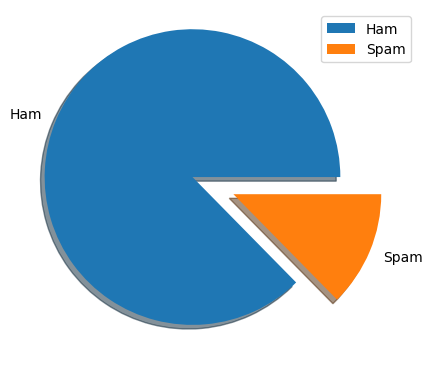

In [144]:
y = [len(data.label[data['label']==0]), len(data.label[data['label']==1])]
mylabels = ["Ham", "Spam"]
myexplode = [0.3, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend()
print("Distribution of ham and spam messages before oversampling")
plt.show() 


# As you see here, the distribution of ham and spam messages are not equal, i.e, the model becomes biased during the training

# Oversampling is a technique used in data analysis to adjust the class distribution of a data set. It's used to increase the representation of minority groups in a sample. 


Now, we have to do word embedding

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=300) 
X=tfidf.fit_transform(data['transformed message']).toarray()
y=data['label'].values

In [36]:
print(X.shape)

(5169, 300)


In [37]:
X[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37241408, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.41195041, 0.        ,
       0.44766955, 0.        , 0.        , 0.        , 0.     

In [38]:
y[3]

0

In [39]:
data

,label,message,num_characters,num_words,transformed message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah dont think goe usf live around though
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,2nd time tri 2 contact u u å£750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,ì b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,guy bitch act like id interest buy someth els ...


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train.shape

(3463, 300)

In [42]:
X_test.shape

(1706, 300)

In [43]:
y_train.shape

(3463,)

In [44]:
y_test.shape

(1706,)

# Oversampling is mostly done using SMOTE technique

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_train, y_train = X_resampled, y_resampled

C:\Users\Varma\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Varma\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [46]:
X_train.shape

(6088, 300)

In [47]:
X_test.shape

(1706, 300)

In [48]:
y_train.shape

(6088,)

In [49]:
y_test.shape

(1706,)

In [50]:
len(y_train[y_train==0])

3044

In [51]:
len(y_train[y_train==1])

3044

Distribution of ham and spam images after SMOTE


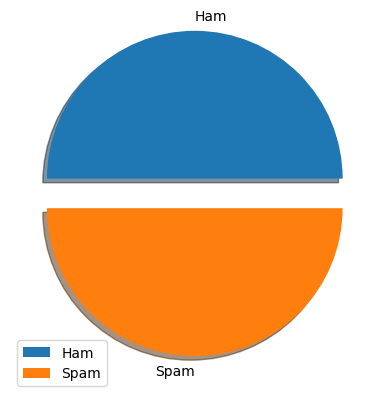

In [146]:
y = [len(y_train[y_train==0]), len(y_train[y_train==1])]
mylabels = ["Ham", "Spam"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend()
print('Distribution of ham and spam images after SMOTE')
plt.show()

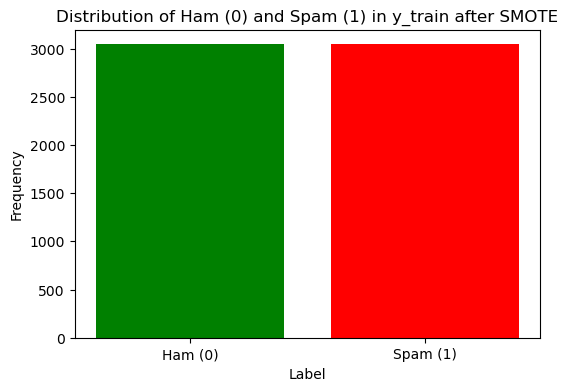

In [53]:
import matplotlib.pyplot as plt

# Count the occurrences of 0 (ham) and 1 (spam) in y_train
label_counts = [sum(y_train == 0), sum(y_train == 1)]

# Create a list of labels for the x-axis
labels = ['Ham (0)', 'Spam (1)']

# Plot the bar graph
plt.figure(figsize=(6, 4))
plt.bar(labels, label_counts, color=['green', 'red'])

# Add titles and labels
plt.title('Distribution of Ham (0) and Spam (1) in y_train after SMOTE')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Display the plot
plt.show()
#

# Building a model using simple Deep Learning (ANN)

In [129]:
def classify_with_ann(email_to_classify):
    
    import tensorflow as tf
    from tensorflow import keras
    
    
    global model
    model = keras.Sequential([
        keras.layers.Dense(200, input_shape=(300,), activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(70, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
# opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer='RMSProp',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=30)
    model.evaluate(X_test, y_test)
    
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global yp_ann
    yp_ann = model.predict(X_email)


    y_pred = []
    for element in yp_ann:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    if y_pred[0] == 1:
        print("SPAM message!")
    else:
        print("Relax, it\'s a Legitimate/Safe message")


In [130]:
email_to_classify = input("Enter the message in the email: ")

Enter the message in the email: Urgent! Your credit card has been blocked. Please pay the penalty and release it


In [131]:
classify_with_ann(email_to_classify)

Epoch 1/30


C:\Users\Varma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6592 - loss: 0.6011
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9477 - loss: 0.3147
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9607 - loss: 0.1124
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0688
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0470
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0368
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0360
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0367
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0365
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0351
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9845 - loss: 0.0357
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.evaluate(X_test, y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.3444


[0.4145287871360779, 0.9730363488197327]

# As you see, the test loss is 14% and the test accuracy is 97% which is very good

In [133]:
yp = model.predict(X_test)
yp

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[2.7874640e-01],
       [4.2941362e-08],
       [2.8355351e-19],
       ...,
       [1.5365734e-03],
       [5.8101423e-12],
       [8.7844955e-07]], dtype=float32)

In [134]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
type(y_pred[0])
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [135]:
y_pred[:20]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [136]:
list(y_test[:20])

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [137]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Classification Report of the model using Deep Learning\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred)) )
print("Precision score: {}". format(precision_score(y_test, y_pred)) )
print("Recall score: {}". format(recall_score(y_test, y_pred)))
print("F1 score: {}". format(f1_score(y_test, y_pred)))
f1_score_ann = f1_score(y_test, y_pred)
f1_score_ann

Classification Report of the model using Deep Learning

Accuracy score: 0.9730363423212193
Precision score: 0.908695652173913
Recall score: 0.8931623931623932
F1 score: 0.9008620689655172


0.9008620689655172

In [72]:
classify_with_ann(email_to_classify)

Epoch 1/30


C:\Users\Varma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7459 - loss: 0.5010
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9644 - loss: 0.0916
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - loss: 0.0587
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0373
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9844 - loss: 0.0338
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9837 - loss: 0.0384
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9851 - loss: 0.0305
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9854 - loss: 0.0313
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0292
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9844 - loss: 0.0300
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9844 - loss: 0.0345
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

Text(0.5, 1.0, 'Confusion Matrix of the model using Deep Learning')

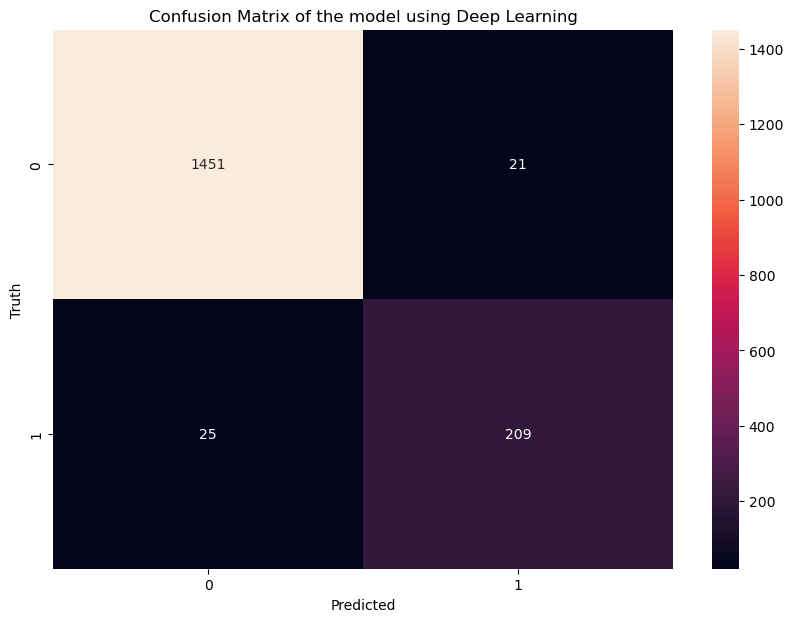

In [138]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix of the model using Deep Learning")

# Building a model using Multinomial Naive Bayes

In [74]:
def classify_with_mnb(email_to_classify):
    from sklearn.naive_bayes import MultinomialNB
    global multinomial_nb_model
    multinomial_nb_model = MultinomialNB()
    multinomial_nb_model.fit(X_train, y_train)
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global yp2 
    yp2 = multinomial_nb_model.predict(X_email)
    y_pred = []
    for element in yp2:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')


In [75]:
classify_with_mnb(email_to_classify)

SPAM message!!


In [76]:
yp2[:10]

array([1], dtype=int64)

In [77]:
y_test[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [78]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of yp2: {yp2.shape}")
y_pred1 = multinomial_nb_model.predict(X_test)


Shape of y_test: (1706,)
Shape of yp2: (1,)


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
yp2 = multinomial_nb_model.predict(X_test)
print("Classification Report of the model using Multinomial Naive Bayes\n")
print("Accuracy score: {}". format(accuracy_score(y_test, yp2)) )
print("Precision score: {}". format(precision_score(y_test, yp2)) )
print("Recall score: {}". format(recall_score(y_test, yp2)))
print("F1 score: {}". format(f1_score(y_test, yp2)))
f1_score_mnb = f1_score(y_test, yp2)
f1_score_mnb

Classification Report of the model using Multinomial Naive Bayes

Accuracy score: 0.936694021101993
Precision score: 0.7086092715231788
Recall score: 0.9145299145299145
F1 score: 0.7985074626865671


0.7985074626865671

Text(0.5, 1.0, 'Confusion Matrix of the model using Multinomial Naive Bayes')

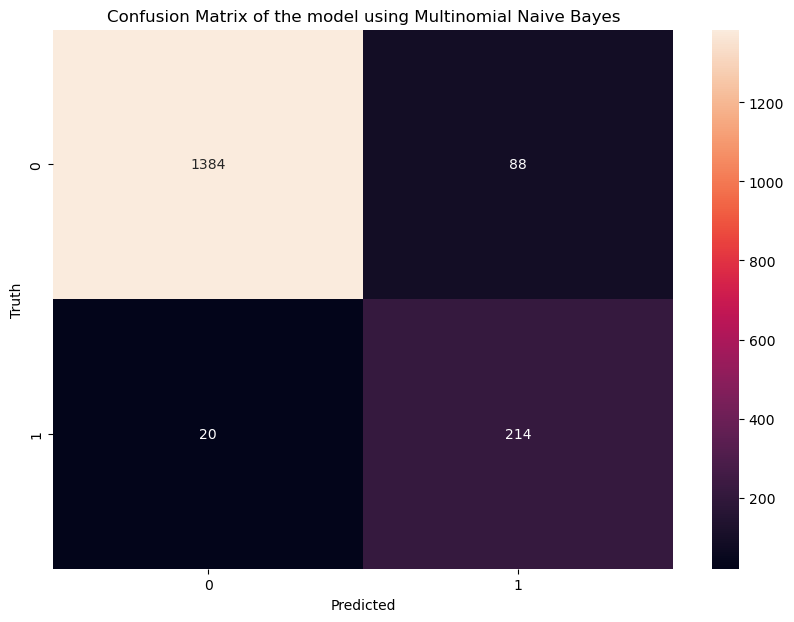

In [80]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix of the model using Multinomial Naive Bayes")

# Building a model using Random Forest Classifier

In [81]:
def classify_with_rfc(email_to_classify):
    from sklearn.ensemble import RandomForestClassifier  
    global random_forest_model 
    random_forest_model= RandomForestClassifier()  
    random_forest_model.fit(X_train, y_train) 
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global p 
    p = random_forest_model.predict(X_email)
    y_pred = []
    for element in p:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')

In [82]:
classify_with_rfc(email_to_classify)

SPAM message!!


In [83]:
p

array([1], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred2 = random_forest_model.predict(X_test)
print("Classification Report of model using Random Forest Classifier\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred2)) )
print("Precision score: {}". format(precision_score(y_test, y_pred2)) )
print("Recall score: {}". format(recall_score(y_test, y_pred2)))
print("F1 score: {}". format(f1_score(y_test, y_pred2)))
f1_score_rfc = f1_score(y_test, y_pred2)
f1_score_rfc

Classification Report of model using Random Forest Classifier

Accuracy score: 0.9595545134818289
Precision score: 0.8340080971659919
Recall score: 0.8803418803418803
F1 score: 0.8565488565488566


0.8565488565488566

Text(0.5, 1.0, 'Confusion Matrix of the model using Random Forest Classifier')

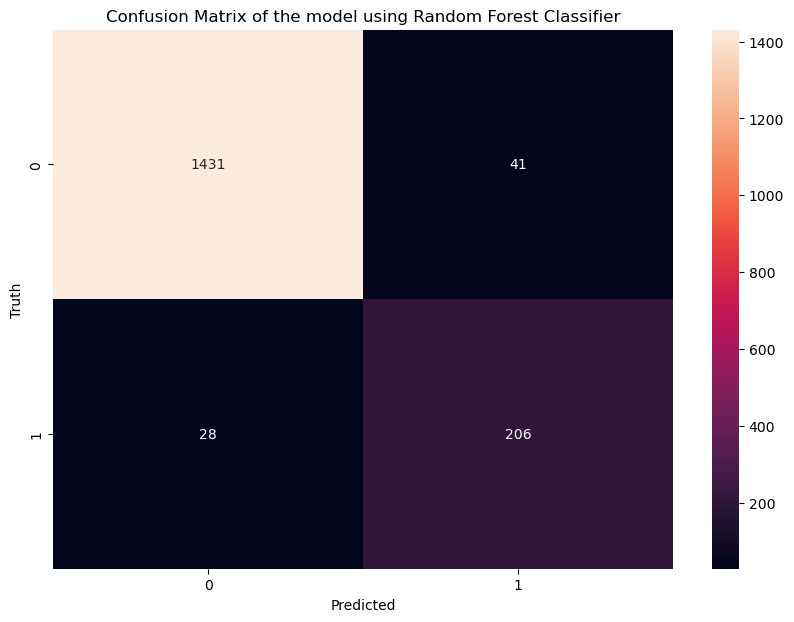

In [85]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix of the model using Random Forest Classifier")

# Building a model using LSTM

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classify_with_lstm(email_to_classify):
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import classification_report
    
    # Reshaping the data into 3D shape for LSTM
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # 1 time step
    global X_test_reshaped
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # 1 time step
    global lstm_model
    # Define the model
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=64, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(1, activation='sigmoid'))
        
    # Compile the model
    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    history = lstm_model.fit(X_train_reshaped, y_train, epochs=7, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])
    
    # Evaluate the model
    test_loss, test_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
    
    # Predict on test data
    y_pred = lstm_model.predict(X_test_reshaped)
    
    # Convert probabilities to binary labels (0 or 1)
    global y_pred_binary
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Print classification report
    #print(classification_report(y_test, y_pred_binary))

    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    global X_email
    X_email = tfidf.transform(email_corpus).toarray()
    X_email = X_email.reshape((X_email.shape[0], 1, X_email.shape[1]))
    global p 
    p = lstm_model.predict(X_email)
    y_pred = []
    for element in p:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')
    #y_pred = lstm_model.predict(X_test_reshaped)
    #y_pred_binary = (y_pred > 0.5).astype(int)

In [106]:
classify_with_lstm(email_to_classify)

Epoch 1/7


C:\Users\Varma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8111 - loss: 0.6240 - val_accuracy: 0.9443 - val_loss: 0.3347
Epoch 2/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9063 - loss: 0.2746 - val_accuracy: 0.9467 - val_loss: 0.1989
Epoch 3/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9225 - loss: 0.1850 - val_accuracy: 0.9402 - val_loss: 0.1900
Epoch 4/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9387 - loss: 0.1528 - val_accuracy: 0.9420 - val_loss: 0.1921
Epoch 5/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9458 - loss: 0.1428 - val_accuracy: 0.9496 - val_loss: 0.1848
Epoch 6/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9499 - loss: 0.1349 - val_accuracy: 0.9496 - val_loss: 0.1927
Epoch 7/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9540 - loss: 0.1192 - val_accuracy: 0.9478 - val_loss: 0.2028
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9459 - loss: 0.1813
Test Loss: 0.18483583629131317
Test Accuracy: 0.

In [107]:
#y_pred = lstm_model.predict(X_test_reshaped)

    
print("Classification Report of model using LSTM\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred_binary)) )
print("Precision score: {}". format(precision_score(y_test, y_pred_binary)) )
print("Recall score: {}". format(recall_score(y_test, y_pred_binary)))
print("F1 score: {}". format(f1_score(y_test, y_pred_binary)))
f1_score_lstm = f1_score(y_test, y_pred_binary)
f1_score_lstm

Classification Report of model using LSTM

Accuracy score: 0.9495896834701055
Precision score: 0.7551724137931034
Recall score: 0.9358974358974359
F1 score: 0.8358778625954199


0.8358778625954199

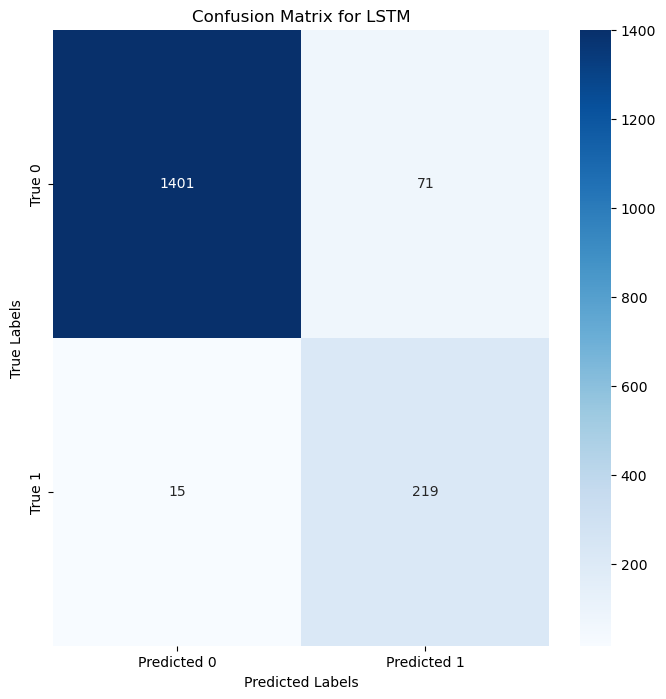

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LSTM')
plt.show()


# Building a model with Logistic Regression

In [109]:
def classify_with_lr(email_to_classify):
    from sklearn.linear_model import LogisticRegression
    global lr_model
    lr_model = LogisticRegression(max_iter=50)
    lr_model.fit(X_train, y_train)
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global y_pred_lr 
    y_pred_lr = lr_model.predict(X_email)
    y_pred = []
    for element in y_pred_lr:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')

In [110]:
classify_with_lr(email_to_classify)

SPAM message!!


In [111]:
y_pred_lr

array([1], dtype=int64)

Classification Report of model using Logistic Regression

Accuracy score: 0.9449003516998827
Precision score: 0.7380952380952381
Recall score: 0.9273504273504274
F1 score: 0.821969696969697
0.821969696969697


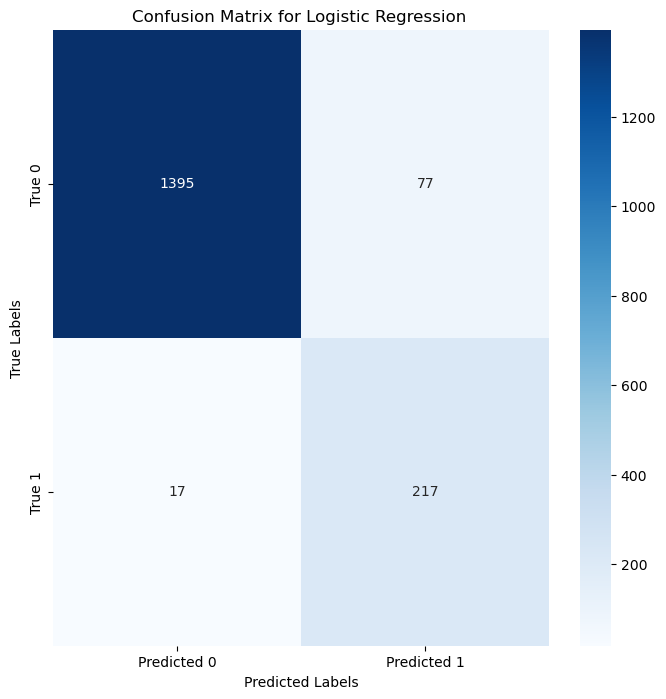

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_p_lr = lr_model.predict(X_test)

print("Classification Report of model using Logistic Regression\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_p_lr)) )
print("Precision score: {}". format(precision_score(y_test, y_p_lr)) )
print("Recall score: {}". format(recall_score(y_test, y_p_lr)))
print("F1 score: {}". format(f1_score(y_test, y_p_lr)))
f1_score_lr = f1_score(y_test, y_p_lr)
print(f1_score_lr)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_p_lr)

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression ')
plt.show()

# Building a model using XGBoost

In [113]:
def classify_with_xgb(email_to_classify):
    import xgboost as xgb
    from sklearn.metrics import classification_report
    global xgb_model
    xgb_model = xgb.XGBClassifier(eval_metric='logloss')
    xgb_model.fit(X_train, y_train) 
    email_txt = process(email_to_classify)
    email_corpus = [email_txt]
    X_email = tfidf.transform(email_corpus).toarray()
    global y_pred_xgb 
    y_pred_xgb = xgb_model.predict(X_email)
    y_pred = []
    for element in y_pred_xgb:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    if y_pred[0] == 1:
        print('SPAM message!!')
    else:
        print('Relax, it\'s a Legitimate/Safe message')

In [114]:
classify_with_xgb(email_to_classify)

SPAM message!!


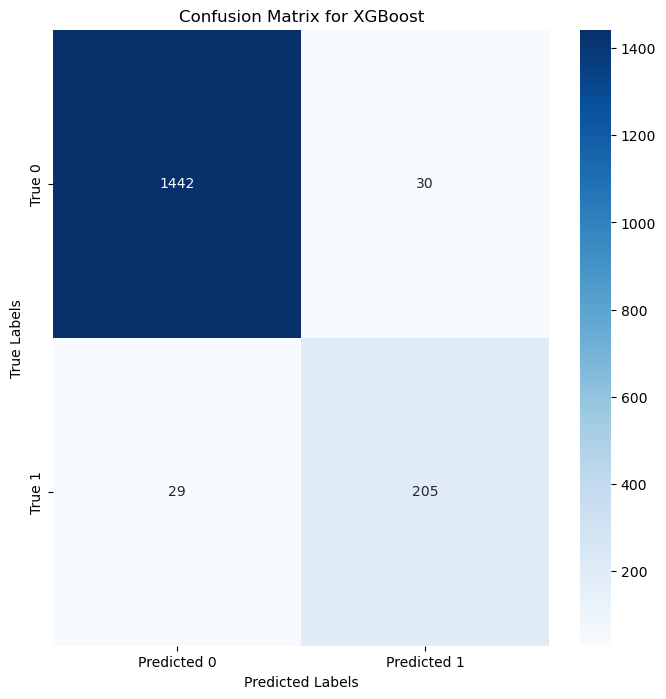

In [115]:
y_pred_xgb = xgb_model.predict(X_test)


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
8
# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()




In [116]:

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Classification Report of model using XGBoost\n")
print("Accuracy score: {}". format(accuracy_score(y_test, y_pred_xgb)) )
print("Precision score: {}". format(precision_score(y_test, y_pred_xgb)) )
print("Recall score: {}". format(recall_score(y_test, y_pred_xgb)))
print("F1 score: {}". format(f1_score(y_test, y_pred_xgb)))
f1_score_xgb = f1_score(y_test, y_pred_xgb)
f1_score_xgb

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1472
           1       0.87      0.88      0.87       234

    accuracy                           0.97      1706
   macro avg       0.93      0.93      0.93      1706
weighted avg       0.97      0.97      0.97      1706

Classification Report of model using XGBoost

Accuracy score: 0.9654161781946072
Precision score: 0.8723404255319149
Recall score: 0.8760683760683761
F1 score: 0.8742004264392325


0.8742004264392325

In [143]:
f1_scores = {'XGBoost': f1_score_xgb,'ANN':f1_score_ann,'Multinomial Naive Bayes':f1_score_mnb,'Random Forest Classifier':f1_score_rfc,'LSTM':f1_score_lstm,'Logistic Regression':f1_score_lr}
for key,value in f1_scores.items():
    print(f"F1-score of {key}: {value}")

F1-score of XGBoost: 0.8742004264392325
F1-score of ANN: 0.9008620689655172
F1-score of Multinomial Naive Bayes: 0.7985074626865671
F1-score of Random Forest Classifier: 0.8565488565488566
F1-score of LSTM: 0.8358778625954199
F1-score of Logistic Regression: 0.821969696969697


In [141]:
model_classifiers = {
    'XGBoost': classify_with_xgb,
    'ANN': classify_with_ann,
    'Multinomial Naive Bayes': classify_with_mnb,
    'LSTM': classify_with_lstm,
    'Random Forest Classifier': classify_with_rfc,
    'Logistic Regression': classify_with_lr
    }


# Find the model with the highest F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_model_name]

print(f"The best model is {best_model_name} with an F1 score of {best_f1_score:.4f}. So, we will be using {best_model_name} for real_time predictions on new data")

The best model is ANN with an F1 score of 0.9009. So, we will be using ANN for real_time predictions on new data


In [127]:
print("The prediction done by the model",best_model_name,"about the entered message is: \n")
result = model_classifiers[best_model_name](email_to_classify)

The prediction done by the model ANN about the entered message is: 

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6993 - loss: 0.5410
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9562 - loss: 0.1004
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9770 - loss: 0.0508
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0383
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9805 - loss: 0.0397
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9834 - loss: 0.0361
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9822 - loss: 0.0350
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9837 - loss: 0.0311
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9858 - loss: 0.0293
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0280
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.988